In [11]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Understanding the data

In [12]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
df.shape

(178, 14)

In [14]:
## Checking for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [15]:
## Normalizing the data as a good practice

features = df.drop(columns=['label'])
label = df['label']

scaler = MinMaxScaler()


scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df = pd.concat([scaled_features_df, label], axis=1)
scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


## Correlation Matrix

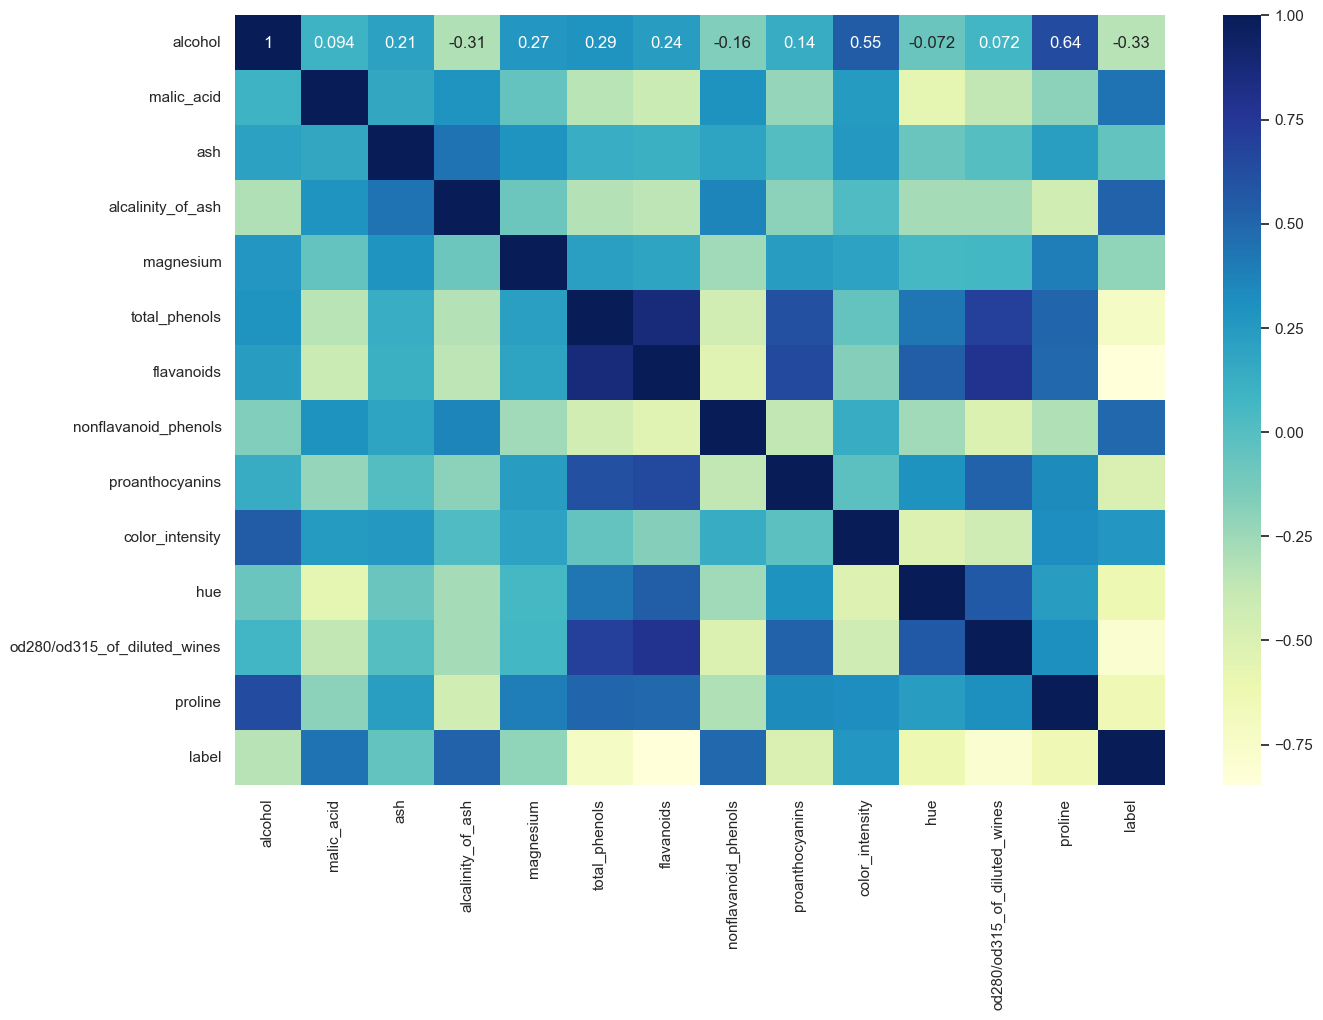

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

/home/enacom/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/enacom/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/enacom/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/enacom/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

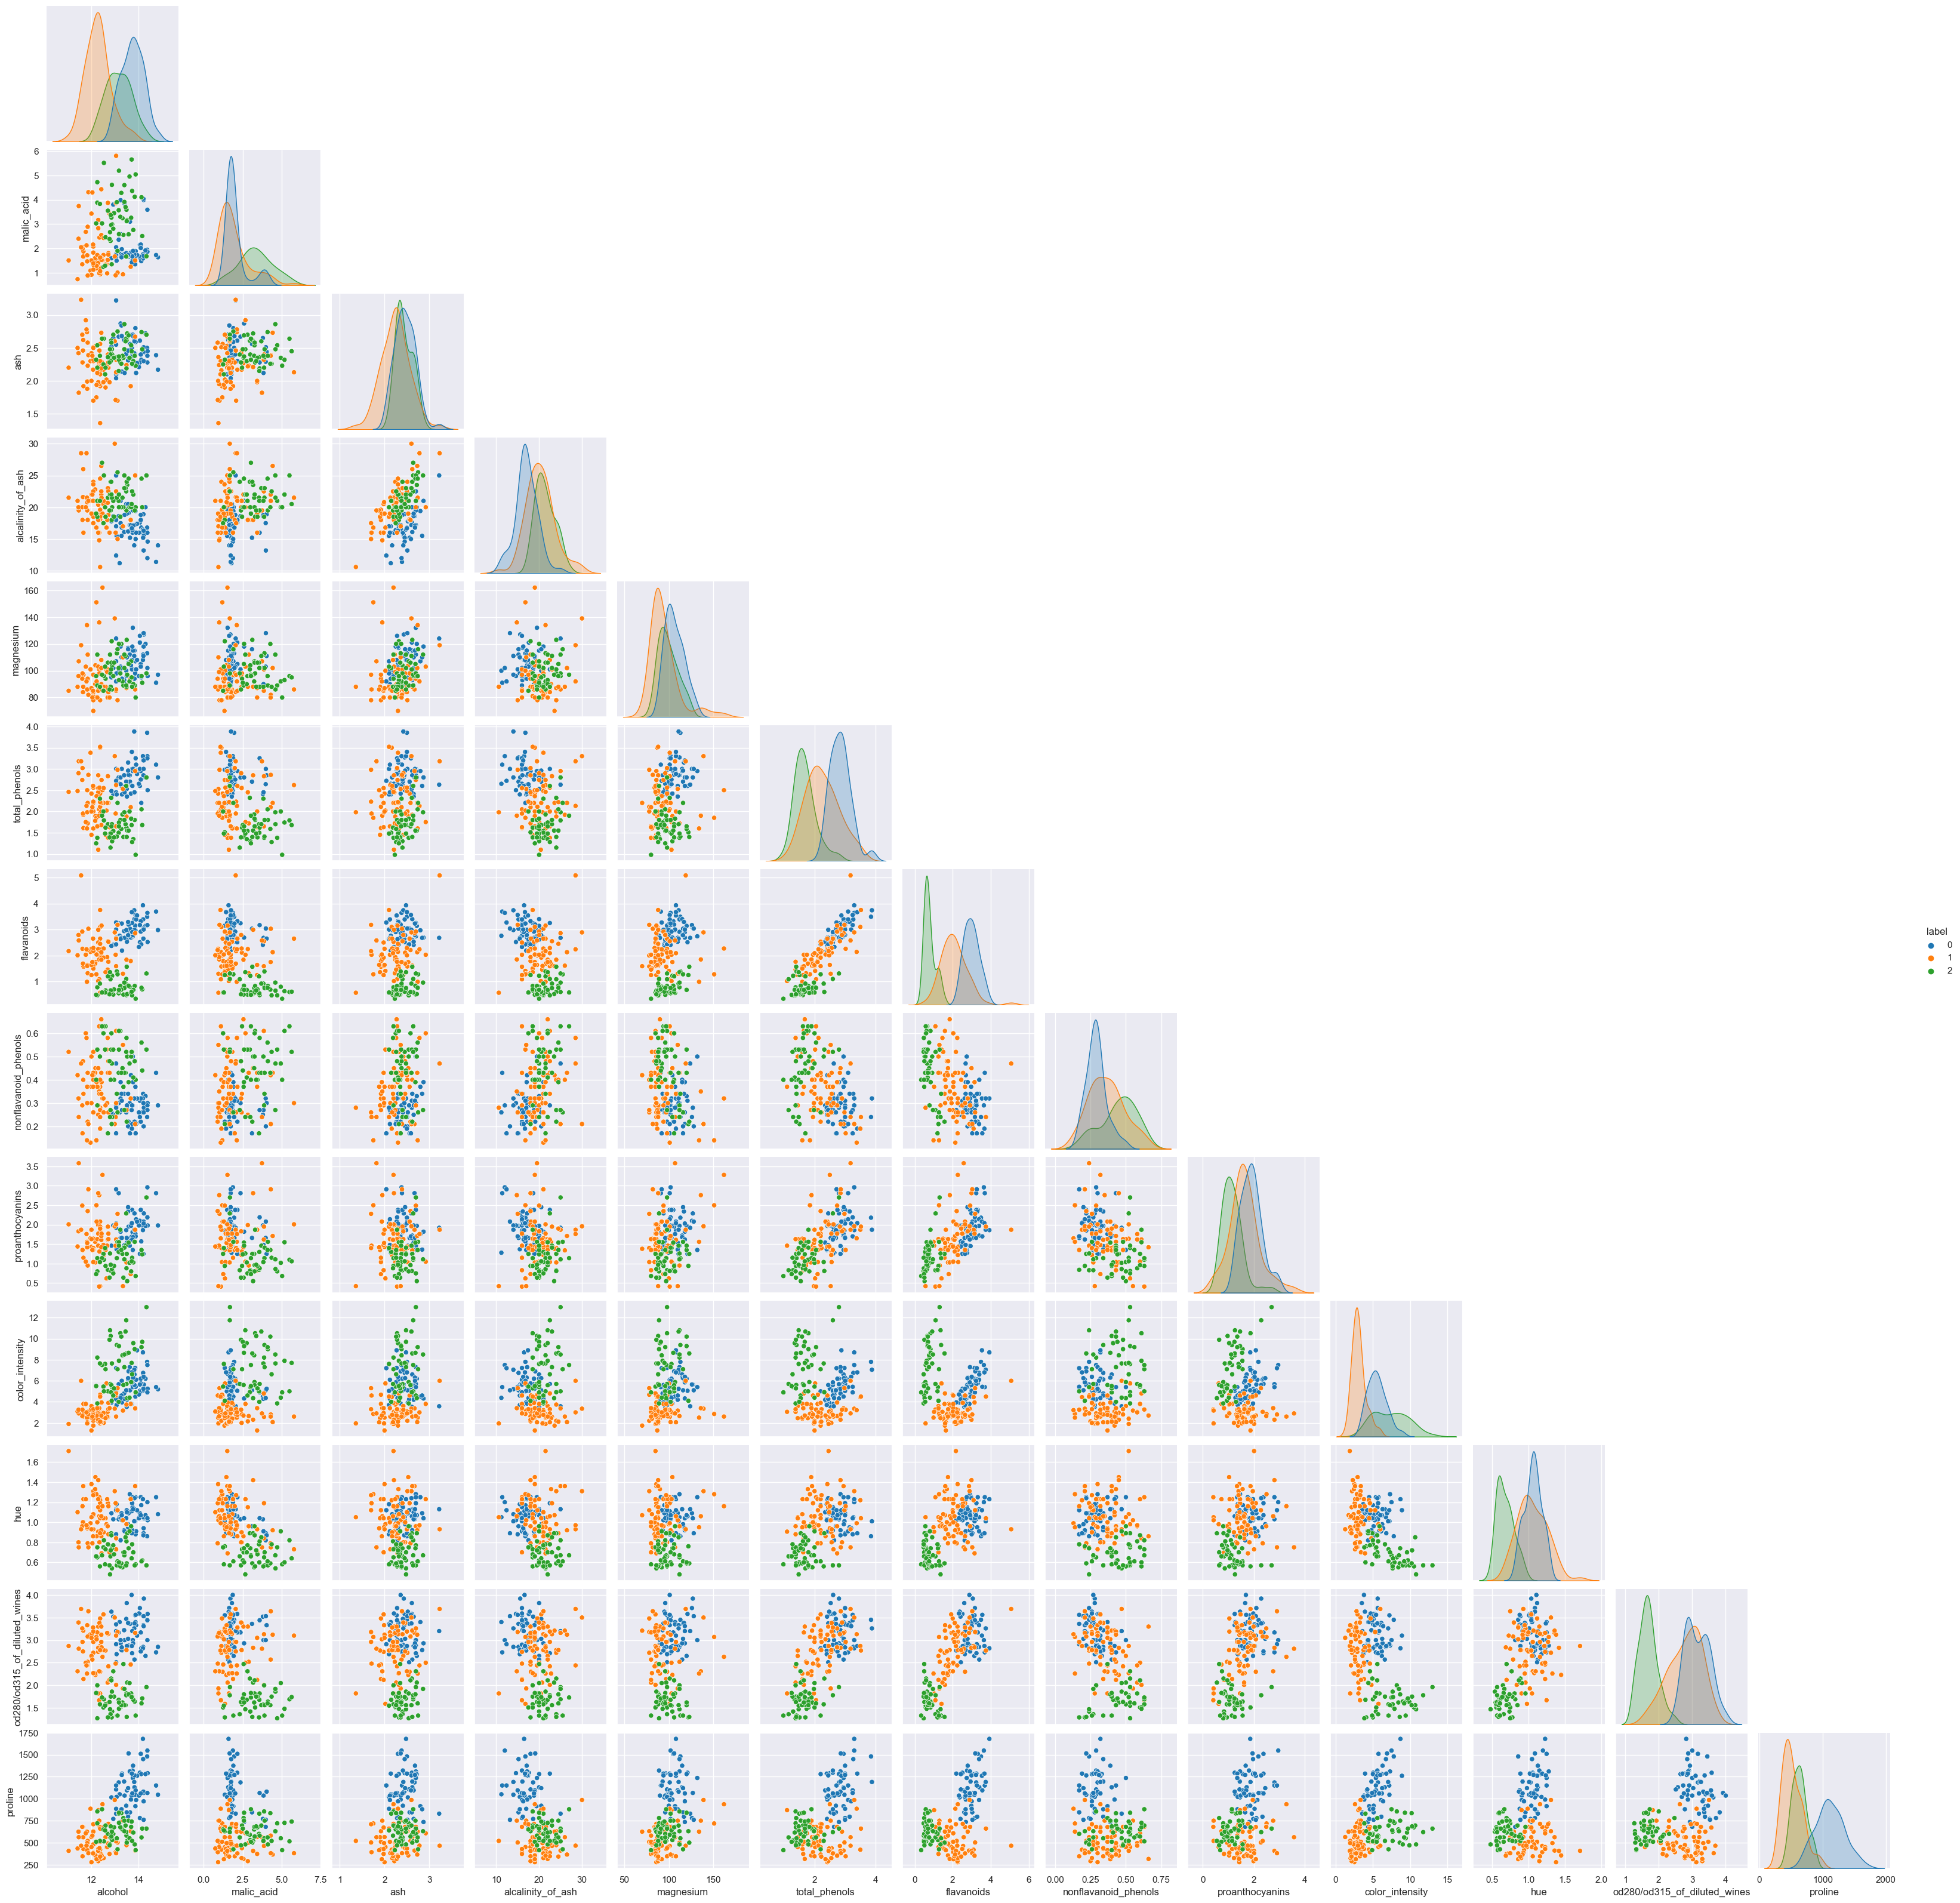

In [17]:
sns.pairplot(df, 
             hue='label', 
             palette="tab10", 
             corner=True)

plt.show()

## PCA

PC	variance
---	--------
PC_1:	0.407
PC_2:	0.19
PC_3:	0.086
PC_4:	0.074
PC_5:	0.056
PC_6:	0.047
PC_7:	0.037
PC_8:	0.024
PC_9:	0.023
PC_10:	0.023
PC_11:	0.014
PC_12:	0.013
PC_13:	0.008


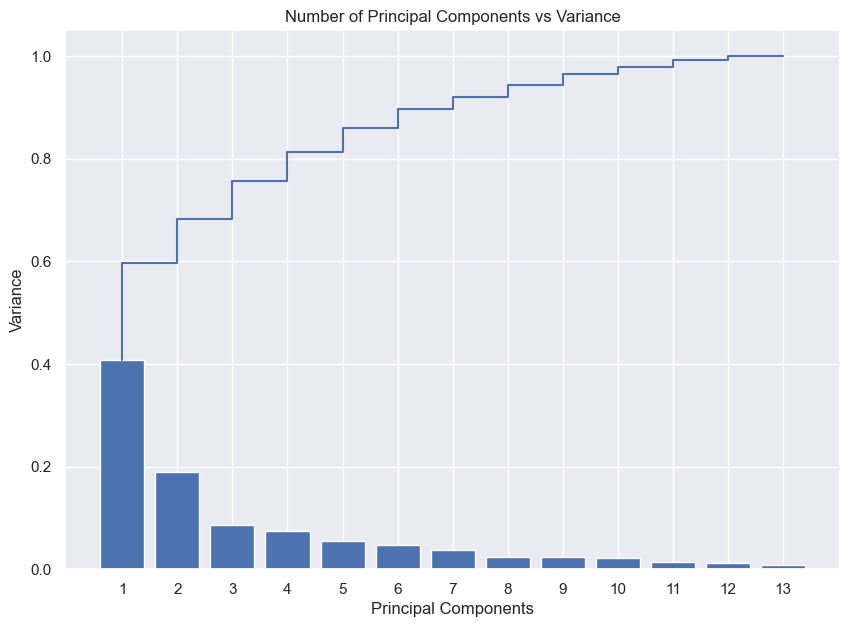

In [27]:
from sklearn.decomposition import PCA
import numpy as np
pc_range = np.arange(1,scaled_features_df.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(scaled_features_df)

plt.figure(figsize=(10,7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Principal Components")
plt.ylabel("Variance")
_ = plt.title("Number of Principal Components vs Variance")

print("PC\tvariance")
print("---\t--------")
for i,k in  enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i+1, round(k, 3)))


## PCA with 3 components

(178, 4)
PC	variance
---	--------
PC_1:	0.407
PC_2:	0.19
PC_3:	0.086
PC_4:	0.074


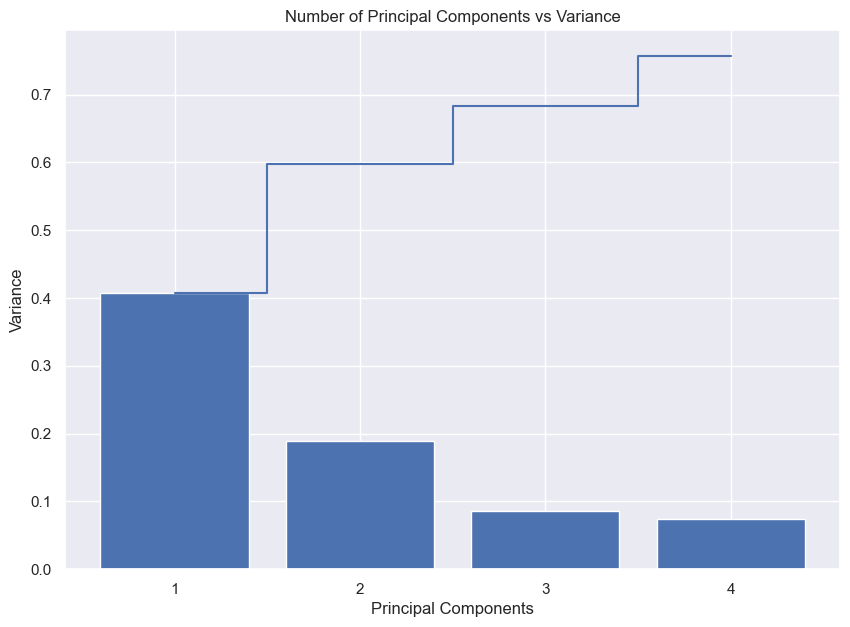

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(scaled_features_df)


pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3', "PC4"])
print(pca_df.shape)


pca_df = pd.concat([pca_df, df[['label']]], axis=1)

# Plotting
pc_range = np.arange(1, 5)
plt.figure(figsize=(10, 7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.xticks(pc_range)
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.title("Number of Principal Components vs Variance")

# Print the variance explained by each principal component
print("PC\tvariance")
print("---\t--------")
for i, k in enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i + 1, round(k, 3)))

plt.show()


In [42]:
pca_df.head()

,PC1,PC2,PC3,PC4,label
0,-0.706336,-0.253193,0.024093,0.013263,0
1,-0.484977,-0.008823,-0.280482,0.075898,0
2,-0.521172,-0.189187,0.196217,-0.015784,0
3,-0.821644,-0.580906,0.081110,0.012235,0
4,-0.202546,-0.059467,0.300240,-0.102051,0


In [43]:
pca_df.shape

(178, 5)

## Comparing model performance

In [46]:
# normal dataset 
from sklearn.model_selection import train_test_split as split
y = df["label"]

X = scaled_features_df


X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

from sklearn.svm import SVC 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
scores[int_cols].head()


      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.5

,param_C,param_kernel,param_degree,param_gamma,mean_test_score
rank_test_score,,,,,
1,0.01,poly,4,NaN,0.976000
2,0.1,poly,2,NaN,0.967333
3,1,rbf,NaN,1,0.967000
4,100,rbf,NaN,0.01,0.959333
4,10,rbf,NaN,0.1,0.959333


In [45]:
# pca dataset
y = pca_df["label"]
X = pca_df.drop(columns=["label"])


X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

from sklearn.svm import SVC 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
scores[int_cols].head()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,param_C,param_kernel,param_degree,param_gamma,mean_test_score
rank_test_score,,,,,
1,1,rbf,NaN,1,0.967667
2,1,rbf,NaN,0.1,0.959667
2,100,rbf,NaN,0.01,0.959667
2,10,rbf,NaN,0.1,0.959667
2,1,poly,1,NaN,0.959667
